# Week 2 Computational Labs
### Wei Han Chia

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

## Lab 5 - Introduction to matplotlib

### Problem 1

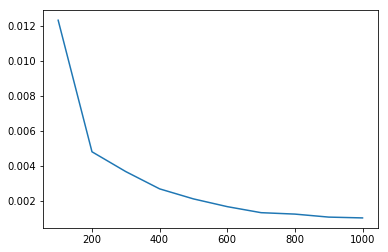

array([ 0.01231549,  0.00479465,  0.00366159,  0.00267471,  0.00210135,
        0.00165846,  0.00131371,  0.0012321 ,  0.00106033,  0.00101382])

In [2]:
def simul(int):
    res = np.random.randn(int,int)
    mean = np.mean(res, axis=1)
    return np.var(mean)

def lln():
    vec = np.linspace(100,1000,10)
    vec = vec.astype(int)
    res = np.ones(10)
    for i in range(0,10):
        res[i] = simul(vec[i])
    return res

results = lln()

plt.figure()
plt.plot(np.linspace(100,1000,10),results)
plt.show()
results

### Problem 2

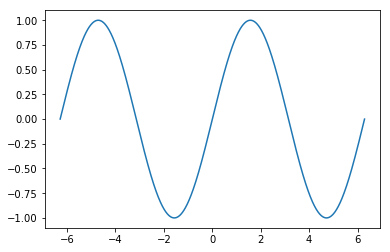

In [3]:
def trigplot(input):
    vec = np.linspace(-2*np.pi, 2*np.pi,1000)
    if input == "sin":
        res = np.sin(vec)
        plt.figure()
        plt.plot(vec,res)
        plt.show()
    elif input == "cos":
        res = np.cos(vec)
        plt.figure()
        plt.plot(vec,res)
        plt.show()
    elif input == "arctan":
        res = np.arctan(vec)
        plt.figure()
        plt.plot(vec,res)
        plt.show()
    else:
        raise ValueError("Wrong Type")

trigplot("sin")

### Problem 3

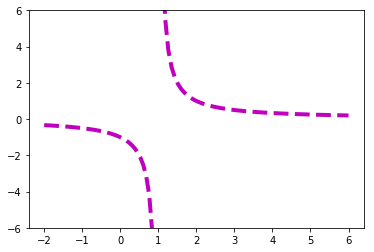

In [4]:
def function3():
    vec = np.linspace(-2,0.99,40)
    vec2 = np.linspace(1.01,6,60)
    res1 = 1/(vec-1)
    res2 = 1/(vec2-1)
    plt.figure()
    plt.plot(vec,res1,'m--',linewidth = 4)
    plt.plot(vec2,res2,'m--',linewidth = 4)
    plt.ylim(-6,6)
    plt.show()
    
function3()

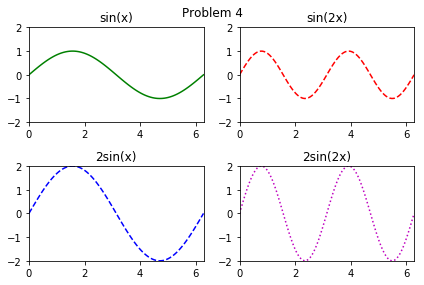

In [5]:
def function4():
    plt.figure()
    vec = np.linspace(0, 2*np.pi, 100)
    plt.subplot(2,2,1)
    plt.plot(vec, np.sin(vec), "g")
    plt.axis([0,2*np.pi,-2,2])
    plt.title("sin(x)")
    
    plt.subplot(2,2,2)
    plt.plot(vec, np.sin(2*vec), "r--")
    plt.axis([0,2*np.pi,-2,2])
    plt.title("sin(2x)")
    
    plt.subplot(2,2,3)
    plt.plot(vec, 2*np.sin(vec), "b--")
    plt.axis([0,2*np.pi,-2,2])
    plt.title("2sin(x)")
    
    plt.subplot(2,2,4)
    plt.plot(vec, 2*np.sin(2*vec), "m:")
    plt.axis([0,2*np.pi,-2,2])
    plt.title("2sin(2x)")
    
    plt.suptitle("Problem 4")
    plt.tight_layout()
    plt.show()
    
function4()

### Problem 5

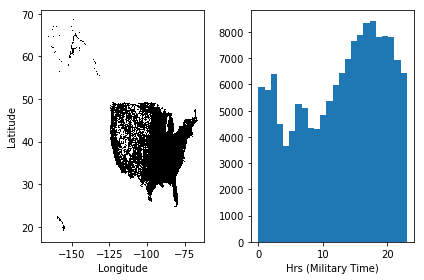

In [6]:
FARS = np.load("FARS.npy")

plt.figure()
plt.subplot(121)
plt.plot(FARS[:,1], FARS[:,2], "k,", markersize=0.001)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.subplot(122)
plt.hist(FARS[:,0], bins=24, range=[0,23])
plt.xlabel("Hrs (Military Time)")

plt.tight_layout()
plt.show()

### Problem 6

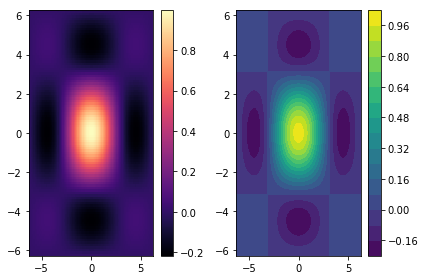

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi,100)
y = x.copy()
X,Y = np.meshgrid(x,y)

#Calculating Function Values
Z = (np.sin(X) * np.sin(Y))/(X * Y)

plt.figure()
plt.subplot(121)
plt.pcolormesh(X,Y,Z, cmap = "magma")
plt.colorbar()
plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])

plt.subplot(122)
plt.contourf(X,Y,Z,15,camp="magma")
plt.colorbar()

plt.tight_layout()
plt.show()

## Lab 12 - Data Visualization

### Problem 1

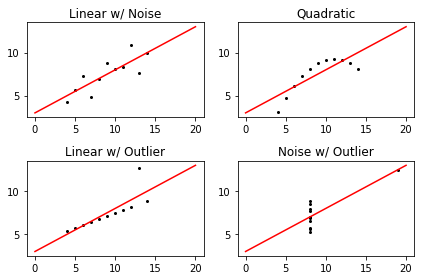

In [8]:
anscombe = np.load("anscombe.npy")

plt.figure()
plt.subplot(221)
plt.plot(anscombe[:,0],anscombe[:,1],"ko",markersize=2)
plt.plot(np.linspace(0,20,20), .5*np.linspace(0,20,20)+3, "r")
plt.title("Linear w/ Noise")
plt.subplot(222)
plt.plot(anscombe[:,2],anscombe[:,3], "ko", markersize=2)
plt.plot(np.linspace(0,20,20), .5*np.linspace(0,20,20)+3, "r")
plt.title("Quadratic")
plt.subplot(223)
plt.plot(anscombe[:,4],anscombe[:,5], "ko", markersize=2)
plt.plot(np.linspace(0,20,20), .5*np.linspace(0,20,20)+3, "r")
plt.title("Linear w/ Outlier")
plt.subplot(224)
plt.plot(anscombe[:,6],anscombe[:,7], "ko", markersize=2)
plt.plot(np.linspace(0,20,20), .5*np.linspace(0,20,20)+3, "r")
plt.title("Noise w/ Outlier")
plt.tight_layout()
plt.show()


Anscombe's quartet shows 4 different scenarios in which we obtain the same regression lines. In the first, we have a some linear data with noise, which gives us the expected linear regression line. 

In the second graph, even though we have a quadratic data, the least squares regression still returns the same regression line.

In the third graph, we have a clear linear relationship, but a single outlier causes the linear regression to return the wrong regression line.

In the fourth graph, we only have a bunch of noisy data and a single outlier, with no clear relationship. However, linear regression still returns the same regression line.

### Problem 2

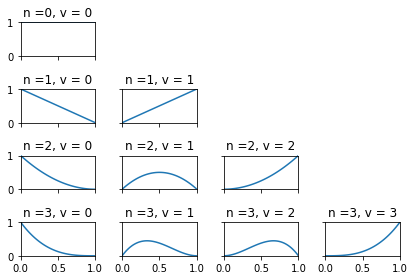

In [9]:
def bernstein(n,v):
    vec = np.linspace(0,1,100)
    res = scipy.special.binom(n,v)*(vec ** v)*((1 -vec)**(n-v))
    return res

for n in range(0,4):
    for v in range(0,4):
        if n >= v:
            plt.subplot(4,4,4*n+(v+1))
            plt.plot(np.linspace(0,1,100),bernstein(n,v))
            plt.axis([0,1,0,1])
            plt.tick_params(which="both", top="off", right ="off")
            if 4*n+(v+1) <  12:
                plt.tick_params(labelbottom="off")
            if v % 4:
                plt.tick_params(labelleft="off")
            plt.title("n =" + str(n) + ", v = " + str(v))
            
plt.tight_layout()
plt.show()

### Problem 3

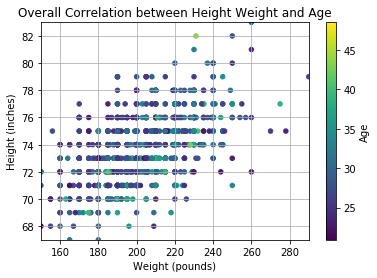

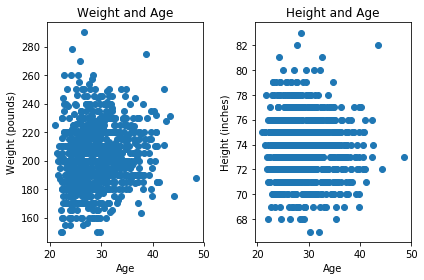

In [32]:
MLB = np.load("MLB.npy")

plt.scatter(MLB[:,1],MLB[:,0], c = MLB[:,2], s= 20)
cbar = plt.colorbar()
cbar.set_label("Age")
plt.grid()
plt.xlabel("Weight (pounds)")
plt.ylabel("Height (inches)")
plt.axis([150,290,67,83])
plt.title("Overall Correlation between Height Weight and Age")

plt.show()

plt.subplot(121)
plt.scatter(MLB[:,2],MLB[:,1])
plt.xlabel("Age")
plt.ylabel("Weight (pounds)")
plt.title("Weight and Age")
plt.subplot(122)
plt.scatter(MLB[:,2], MLB[:,0])
plt.xlabel("Age")
plt.ylabel("Height (inches)")
plt.title("Height and Age")
plt.tight_layout()

plt.show()

From the first graph, we clearly see a positive correlation between height and weight in the MLB data. However, looking at the color map for age shows that there is no clear correlation. We can further visualize this by looking at the scatter plots of weight and height on age, which shows that they are not correlated.

### Problem 4

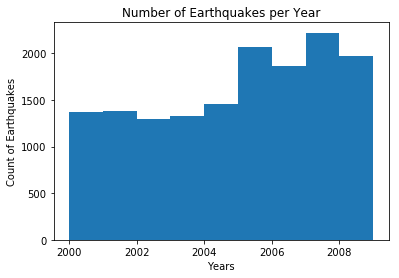

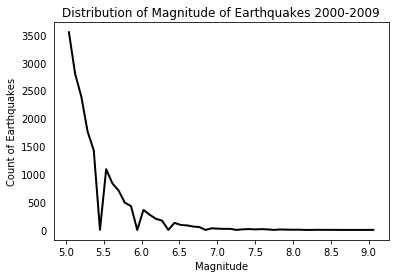

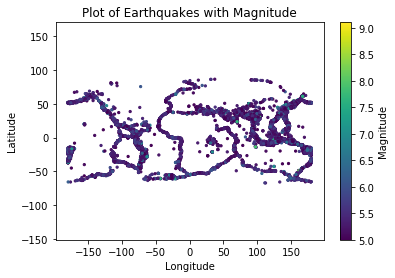

In [54]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

#Lets answer the question of how many earthquakes happened in a year with a histogram.
plt.hist(year,bins=9,range=[2000,2009],lw=0,histtype="stepfilled")
plt.xlabel("Years")
plt.ylabel("Count of Earthquakes")
plt.title("Number of Earthquakes per Year")
plt.show()

#Lets answer the question of how often stronger earthquakes happen compared to weaker ones with a line histogram
freq, bin_edges = np.histogram(magnitude, bins =50)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centers, freq, 'k-', lw=2)
plt.tick_params(left="off",top="off",right="off")
plt.xlabel("Magnitude")
plt.ylabel("Count of Earthquakes")
plt.title("Distribution of Magnitude of Earthquakes 2000-2009")
plt.show()

#Lets answer the question of where earthquakes happen and their strength with a heat map
plt.scatter(longitude, latitude, c=magnitude, s=5)
plt.axis("equal")
cbar = plt.colorbar()
cbar.set_label("Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Plot of Earthquakes with Magnitude")


plt.show()

* On average about 1500 earthquakes happened every year, with the maximum number of earthquakes happening from 2007-2008.
* We have an exponential scale for how often stronger earthquakes happen compared to weaker ones.
* We see that earthquakes tend to occur along fault lines. With the strongest earthquakes tending to happen from latitudes [0,-100]

### Problem 5

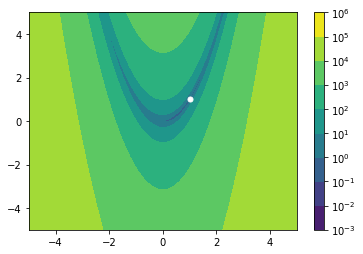

In [68]:
from matplotlib.colors import LogNorm
X = np.linspace(-5,5,200)
X, Y = np.meshgrid(X, X.copy())
Z = (1 - X) ** 2 + 100 * (Y - X **2) ** 2

plt.contourf(X,Y,Z,24,cmap="viridis", norm=LogNorm())
plt.colorbar()
plt.plot([1],[1],"wo",markersize=5)
plt.show()

Observing the graph shows a darkest color line which represents the banana shaped valley containing the minimum of the function.

### Problem 6

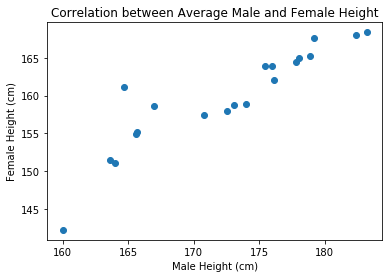

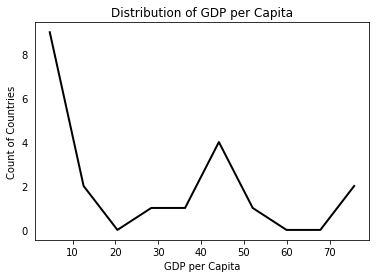

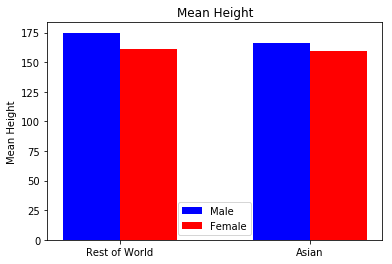

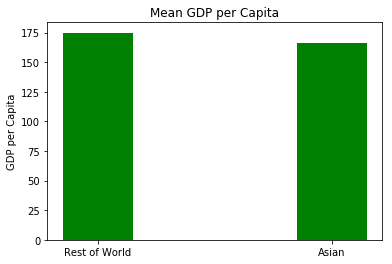

In [155]:
pop, GDP, mheight, fheight = np.load("countries.npy").T
countries = ["Austria", "Bolivia", "Brazil", "China", "Finland","Germany","Hungary","India","Japan","North Korea","Montenegro","Norway","Peru","South Korea","Sri Lanka","Switzerland","Turkey","United Kingdom","United States","Vietnam"]

#Lets plot a scatterplot of male and female height
plt.scatter(mheight, fheight)
plt.xlabel("Male Height (cm)")
plt.ylabel("Female Height (cm)")
plt.title("Correlation between Average Male and Female Height")
plt.show()

#Lets plot a line-histogram of GDP per Capita
GDPpercap = GDP/pop
freq, bin_edges = np.histogram(GDPpercap, bins =10)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centers, freq, 'k-', lw=2)
plt.tick_params(left="off",top="off",right="off")
plt.xlabel("GDP per Capita")
plt.ylabel("Count of Countries")
plt.title("Distribution of GDP per Capita")
plt.show()

#Lets plot a bar chart of male height for asian countries vs the rest of the world
asia = ["China","India","Japan","North Korea","South Korea","Vietnam","Sri Lanka"]
asianmheight = 0
asianpop = 0
asianfheight =0
for i in asia:
    index = countries.index(i)
    asianmheight += mheight[index]*pop[index]
    asianfheight += fheight[index]*pop[index]
    asianpop += pop[index]

amheight = asianmheight/asianpop
afheight = asianfheight/asianpop

nonasianmheight = np.sum(mheight*pop) - asianmheight
nonasianfheight = np.sum(fheight*pop) - asianfheight
nonasianpop = np.sum(pop)- asianpop

nonamheight = nonasianmheight/nonasianpop
nonafeight = nonasianfheight/nonasianpop

fig = plt.figure()
width = 0.3
N = 2
ind = np.arange(N)

ax = fig.add_subplot(111)
yvals = [nonamheight, amheight]
rects1 = ax.bar(ind, yvals, width, color="b")
zvals = [nonafeight, afheight]
rects2 = ax.bar(ind + width, zvals, width, color="r")

ax.set_ylabel("Mean Height")
ax.set_xticks(ind + width/2)
ax.set_xticklabels( ("Rest of World","Asian"))
ax.legend( (rects1[0],rects2[0]),("Male","Female"))
plt.title("Mean Height")

plt.show()


# Finally let us plot a bar chart of GDP per Capita for Asian Countries vs Rest of the World 
asiangdp = 0
for i in asia:
    index = countries.index(i)
    asiangdp += GDP[index]*pop[index]

agdp = asiangdp/asianpop

nonasiangdp = np.sum(GDP*pop) - asiangdp

nonagdp = nonasiangdp/nonasianpop

fig = plt.figure()
width = 0.3
N = 2
ind = np.arange(N)

ax = fig.add_subplot(111)
yvals = [nonamheight, amheight]
rects1 = ax.bar(ind, yvals, width, color="g")

ax.set_ylabel("GDP per Capita")
ax.set_xticks(ind)
ax.set_xticklabels( ("Rest of World","Asian"))
plt.title("Mean GDP per Capita")

plt.show()



* From the first graph, we see that there is a correlation between male height and female height for each country.
* From the second graph, we see that the distribution of GDP per Capita has 3 peaks, with many more countries in this sample in the lower end, and a large group around the middle.
* From the third graph, we see that on average, males are taller than females, and asians are shorter than the rest of the world.
* From the fourth graph, we see that on average, the GDP of asian countries is smaller than the GDP of the rest of the world in our sample

## Lab 6 - Pandas 1

In [2]:
import pandas as pd

### Problem 1

In [159]:
val1 = -3
s1 = pd.Series(-3, index = np.linspace(2,10,5))

d1 = {'Bill':31,'Sarah':28,'Jane':34,'Joe':26}
s2 = pd.Series(d1)

### Problem 2

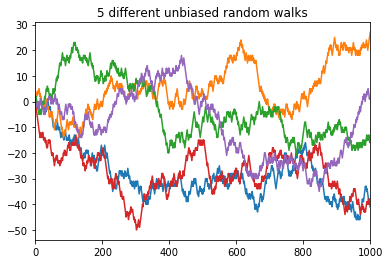

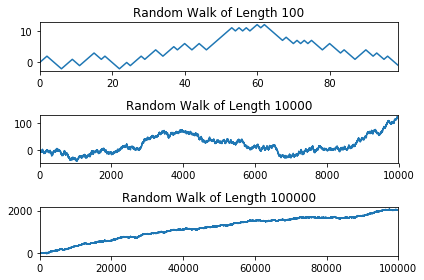

In [182]:
N = 1000

for i in range(0,5):
    s = np.zeros((N))
    s[1:] = np.random.binomial(1,.5,size=(N-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    s.plot()
    plt.title("5 different unbiased random walks")
    
plt.show()

nvec = [100,10000,100000]
for i in range(0,3):
    n = nvec[i]
    s = np.zeros((n))
    s[1:] = np.random.binomial(1,.51,size=(n-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    plt.subplot(3,1,i+1)
    plt.title("Random Walk of Length "+str(n))
    s.plot()

plt.tight_layout()
plt.show()

### Problem 3

In [196]:
# Build toy data for SQL operations
name = ['Mylan','Regan','Justin','Jess','Jason','Remi','Matt','Alexander','JeanMarie']
sex = ['M','F','M','F','M','F','M','M','F']
age = [20,21,18,22,19,20,20,19,20]
rank = ['Sp','Se','Fr','Se','Sp','J','J','J','Se']
ID = range(9)
aid = ['y','n','n','y','n','n','n','y','n']
GPA = [3.8,3.5,3.0,3.9,2.8,2.9,3.8,3.4,3.7]
mathID = [0,1,5,6,3]
mathGD = [4.0,3.0,3.5,3.0,4.0]
major = ['y','n','y','n','n']

studentinfo = pd.DataFrame({'ID':ID,'Name':name,'Sex':sex,'Age':age,'Class':rank})
otherinfo = pd.DataFrame({'ID':ID,'GPA':GPA,'Financial_Aid':aid})
mathinfo = pd.DataFrame({'ID':mathID,'Grade':mathGD,'Math_Major':major})

studentinfo[(studentinfo['Age'] >19) & (studentinfo['Sex'] == 'M')][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [198]:
pd.merge(studentinfo[studentinfo['Sex']=='M'] ,otherinfo,on='ID')[['ID','Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


### Problem 5

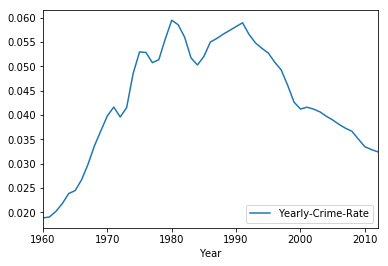

Top 5 years of yearly crime rate in descending order: [1980, 1991, 1981, 1990, 1989]
Years in which number of total crimes was below average, but number of burglaries was above average: [1973, 1974]


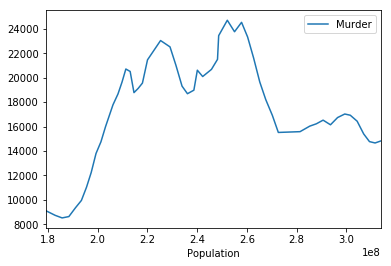

In [33]:
# Load Data
crime_data = pd.read_csv('crime_data.txt',header =1,index_col=0)

# Generate Yearly Crime Rate
crime_data['Yearly-Crime-Rate'] = crime_data['Total'] / crime_data['Population']

# Plot Yearly Crime Rate as Function of Year
crime_data.plot(y='Yearly-Crime-Rate',use_index=True)
plt.show()

# Listing the top 5 years with highest yearly crime rate in descending order
print("Top 5 years of yearly crime rate in descending order: " + str(crime_data.sort_values('Yearly-Crime-Rate',ascending=False).index.tolist()[0:5]))

#Calculating Average number of total crimes and burglary between 1960 and 2012.
meanbug, meantot = crime_data[['Burglary','Total']].mean(axis=0)

#Finding number of years in which total number of crimes was below average, but number of burglaries above average
print("Years in which number of total crimes was below average, but number of burglaries was above average: " + str(crime_data[(crime_data['Burglary'] > meanbug) & (crime_data['Total'] < meantot)].index.tolist()))

#Plotting Number of Murders as a Function of Population
crime_data.plot(x="Population",y='Murder')
plt.show()

#Subsetting data for population, violent and robbery in the 1980s and exporting to csv
crime_subset = crime_data.reindex(index=range(1980,1990),columns=['Population','Violent','Robbery'])
crime_subset.to_csv("crime_subset.txt")


## Lab 8 - Pandas 3

### Problem 1

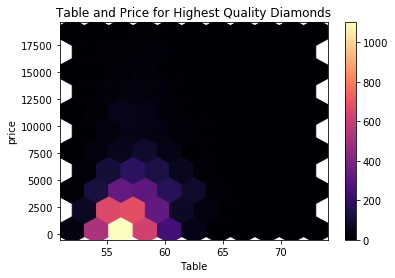

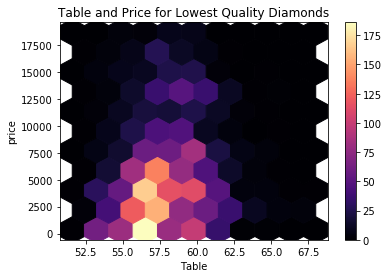

In [311]:
import pydataset as data
diamonds = data.data('diamonds')
color = diamonds.groupby('color')

D = color.get_group("D")
D.plot.hexbin('table','price',gridsize = 10, cmap='magma',sharex=False)
plt.xlabel("Table")
plt.title("Table and Price for Highest Quality Diamonds")

J = color.get_group("J")
J = color.get_group("J")
J.plot.hexbin('table','price',gridsize=10,cmap='magma',sharex=False)
plt.xlabel("Table")
plt.title("Table and Price for Lowest Quality Diamonds")

We know that the table of a diamond (the ratio of the largest flat surface to the width of the diamond) is an important feature in determining the brilliance of the diamond). In order to visualize this, we first group the diamonds by their color, another potential differentiating feature. Comparing both plots shows that the optimal table for price is between 55-60 for both diamond types. However, we note that we have a much larger concentration of high quality diamonds in lower prices and table, while a much larger variation of table values for lower quality diamonds. This could be attributed to the relative sizes of the diamonds, since we would expect a large variety of sizes available to lower quality diamonds, which gives the larger variation in price. 

### Problem 2

In [68]:
# Investigating effect of embarked on survival
titanic = pd.read_csv("titanic.csv")
titanic.groupby('Embarked').mean()['Survived']

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64

In [70]:
# Pivot Table of Embarked and Sex
titanic.pivot_table('Survived', index=['Sex'], columns=['Embarked'])

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170144


The two tables both seem to suggest that regardless of gender, individuals who embark from 'C' have a higher survival rate. However, this just means that there is a correlation between the embarked location and survival, which might not be causal. To investigate this further, we should see if similar trends hold when comparing survival rates across embarked location and other variables.

In [79]:
pivot1 = titanic.pivot_table('Survived', index=['Pclass'], columns = ['Embarked'])

age = pd.cut(titanic['Age'],[0,12,18,50,80])
pivot2 = titanic.pivot_table('Survived', index=[age], columns = ['Embarked'])

print(pivot1)
print(pivot2)

Embarked         C         Q         S
Pclass                                
1.0       0.687943  0.666667  0.559322
2.0       0.571429  0.285714  0.417355
3.0       0.366337  0.353982  0.210101
Embarked         C         Q         S
Age                                   
(0, 12]   0.812500  0.000000  0.561644
(12, 18]  0.666667  0.500000  0.333333
(18, 50]  0.601351  0.294118  0.337391
(50, 80]  0.592593  0.000000  0.338710


Comparing by class of passenger shows that the embarked location doesn't really affect survival probability, since the survival rates of all 3 classes are comparable regardless of embarked location. This seems to suggest that the true factor explaining the varying survival rates between embarked locations is the fact that more first class passengers might have embarked in 'C'.

Comparing by age of passengers also shows a potential explanation for the low survival rates of 'Q'. From our table, we see that bulk of the passengers in Q were of ages 12-50, and these ages have a lower survival rates compared to those from 0-12, which makes up a larger component of C and S. This might also explain why we see an increased survival rate for passengers who embarked from 'C'

## Lab 1 - Pandas IV

### Problem 1

In [7]:
DJIA = pd.read_csv("DJIA.csv", header=0, index_col =0)
DJIA.index = pd.to_datetime(DJIA.index)
DJIA = DJIA.T.squeeze()
DJIA = DJIA.replace(".",np.nan)
DJIA = pd.to_numeric(DJIA)

### Problem 2

In [8]:
paychecks = pd.read_csv("paychecks.csv",index_col=False,header=None, squeeze=True)

range1 = pd.date_range(start = '3/13/2008', periods=47, freq="WOM-1FRI")
range2 = pd.date_range(start ='3/13/2008', periods=46, freq="WOM-3FRI")
dates = range1.union(range2)

paychecks.index = pd.to_datetime(dates)

### Problem 3

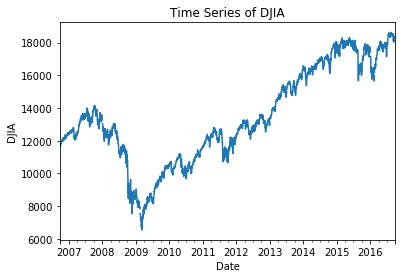

In [9]:
DJIA.plot()
plt.xlabel("Date")
plt.ylabel("DJIA")
plt.title("Time Series of DJIA")
plt.show()

### Problem 4

In [10]:
quarterrange = pd.period_range("1978-9", periods =84, freq="Q-AUG")
# Note here that the fiscal year ends in August

finances = pd.read_csv("finances.csv",index_col=False,header=0)
finances.index = quarterrange

### Problem 5

In [11]:
#Mean Daily Duration - Data provided is for 1 day
website_traffic = pd.read_csv("website_traffic.csv", index_col=False, header=0)
website_traffic['Length']=pd.to_datetime(website_traffic['LEAVE']) - pd.to_datetime(website_traffic['ENTER'])
website_traffic.index = pd.to_datetime(website_traffic['ENTER'])
website_traffic['Length'].mean()

#Counts of Visits per Hour
website_traffic1 = pd.read_csv("website_traffic.csv", index_col=1, header=0)
website_traffic1.index = pd.to_datetime(website_traffic1.index)
website_traffic1['Count'] = np.ones(14235)
hourlyvisit = website_traffic1['Count'].resample('H').sum()
hourlyvisit = hourlyvisit.to_period() #Converting to period index

### Problem 6

In [12]:
# Day with largest gain and Largest Loss
DJIA2 = DJIA.shift(1)
DJIAgain = DJIA - DJIA2
DJIAgain = DJIAgain.to_period()

print("Highest gain day: " +str(DJIAgain[DJIAgain == DJIAgain.max()].index.tolist()))

print("Highest loss day: " +str(DJIAgain[DJIAgain == DJIAgain.min()].index.tolist()))

#Downsampling to get Monthly Data
DJIAm = DJIA.resample('M').sum() #We sum to get difference between months
DJIAm2 = DJIAm.shift(1)
DJIAmgain = DJIAm - DJIAm2
DJIAmgain = DJIAmgain.to_period()

print("Highest gain month: " + str(DJIAmgain[DJIAmgain==DJIAmgain.max()].index.tolist()))

print("Highest loss month: " + str(DJIAmgain[DJIAmgain==DJIAmgain.min()].index.tolist()))


Highest gain day: [Period('2008-10-13', 'B')]
Highest loss day: [Period('2008-09-29', 'B')]
Highest gain month: [Period('2006-10', 'M')]
Highest loss month: [Period('2016-09', 'M')]


### Problem 7

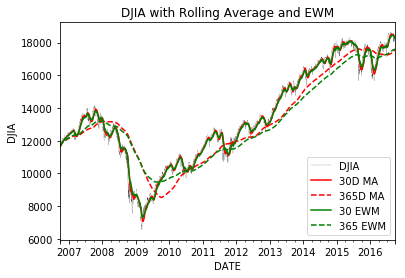

In [13]:
#Lets generate our averages
roll30 = DJIA.rolling(window='30D',center=False).mean()
roll365 = DJIA.rolling(window='365D',center=False).mean()
ewm30 = DJIA.ewm(span=30).mean()
ewm365 = DJIA.ewm(span=365).mean()

#Plotting Graph

ax_DJIA = DJIA.plot(style="k--", lw=0.2, label='DJIA')
roll30.plot(ax = ax_DJIA, color="r", label='30D MA')
roll365.plot(ax = ax_DJIA, style="r--", label='365D MA')
ewm30.plot(ax = ax_DJIA, legend=0, style="g", label='30 EWM')
ewm365.plot(ax = ax_DJIA, legend =0, style="g--", label='365 EWM')
plt.ylabel("DJIA")
plt.title("DJIA with Rolling Average and EWM")
plt.legend()
plt.show()

## Problem 6 - Ricardo's Lifetime

In [220]:
#Lets load some data and do some cleaning
Chic = pd.read_csv("Chic.csv", skiprows=0, index_col=False)
Chic['STATION'] = "Chicago"
Chic['DATE'] = pd.to_datetime(Chic['DATE'])
Chic.index = Chic['DATE']
Chic['DOY'] = Chic.index.dayofyear

Indi = pd.read_csv("Indi.csv", skiprows=0, index_col=False)
Indi['STATION'] = "Indiana"
Indi['DATE'] = pd.to_datetime(Indi['DATE'])
Indi.index = Indi['DATE']
Indi['DOY'] = Indi.index.dayofyear

Pitt = pd.read_csv("Pitt.csv", skiprows=0, index_col=False)
Pitt['STATION'] = "Pittsburgh"
Pitt['DATE'] = pd.to_datetime(Pitt['DATE'])
Pitt.index = Pitt['DATE']
Pitt['DOY'] = Pitt.index.dayofyear

Miam = pd.read_csv("Miam.csv", skiprows=0, index_col=False)
Miam['STATION'] = "Miami"
Miam['DATE'] = pd.to_datetime(Miam['DATE'])
Miam.index = Miam['DATE']
Miam['DOY'] = Miam.index.dayofyear

Wash = pd.read_csv("Wash.csv", skiprows=0, index_col=False)
Wash['STATION'] = "Washington"
Wash['DATE'] = pd.to_datetime(Wash['DATE'])
Wash.index = Wash['DATE']
Wash['DOY'] = Wash.index.dayofyear

#Finding datapoints for "Jan 22 1975" and "Jul 14 1988"
borndate = datetime(1975,1,22)
born = Indi.loc[borndate]

llwindate = datetime(1988,7,14)
llwin = Pitt.loc[llwindate]

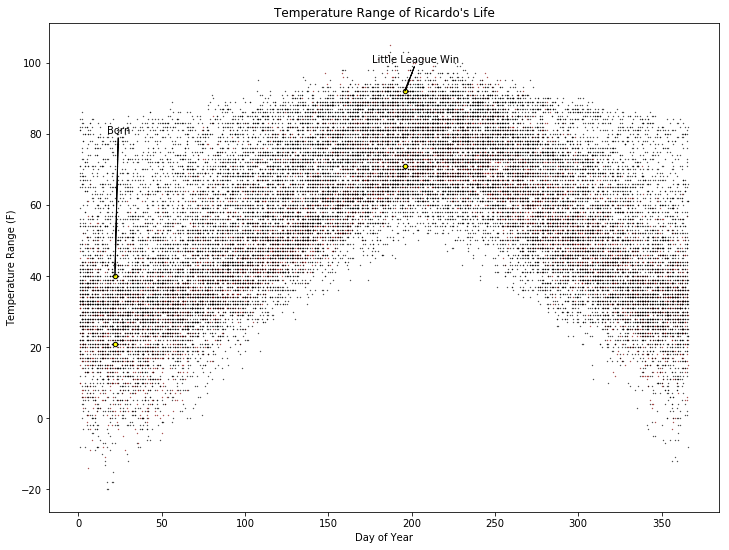

In [246]:
ax = Chic.plot.scatter('DOY','TMAX', c='maroon', s=0.1)
Chic.plot.scatter('DOY','TMIN', c='maroon', s=0.1, ax=ax)

Indi.plot.scatter('DOY','TMAX', c='k', s=0.1, ax=ax)
Indi.plot.scatter('DOY','TMIN', c='k', s=0.1, ax=ax)

Wash.plot.scatter('DOY','TMAX', c='k', s=0.1, ax=ax)
Wash.plot.scatter('DOY','TMIN', c='k', s=0.1, ax=ax)

Miam.plot.scatter('DOY','TMAX', c='k', s=0.1, ax=ax)
Miam.plot.scatter('DOY','TMIN', c='k', s=0.1, ax=ax)

Pitt.plot.scatter('DOY','TMAX', c='k', s=0.1, ax=ax)
Pitt.plot.scatter('DOY','TMIN', c='k', s=0.1, ax=ax)

ax.scatter(born['DOY'],born['TMAX'], c='yellow', marker='o', s=20, edgecolors='black')
ax.scatter(born['DOY'],born['TMIN'], c='yellow', marker='o', s=20, edgecolors='black')
ax.annotate("Born",xy=(born['DOY'],born['TMAX']), xytext=(born['DOY']-5, 80), arrowprops=dict(facecolor='black', shrink=0, width=0.1, headwidth=1))

ax.scatter(llwin['DOY'],llwin['TMAX'], c='yellow', marker='o', s=20, edgecolors='black')
ax.scatter(llwin['DOY'],llwin['TMIN'], c='yellow', marker='o', s=20, edgecolors='black')
ax.annotate("Little League Win",xy=(llwin['DOY'],llwin['TMAX']), xytext=(llwin['DOY']-20, 100), arrowprops=dict(facecolor='black', shrink=0, width=0.1, headwidth=1))

ax.set_xlabel("Day of Year")
ax.set_ylabel("Temperature Range (F)")
ax.set_title("Temperature Range of Ricardo's Life")
plt.show()

## Problem 7 - 3D Histogram

### (a)

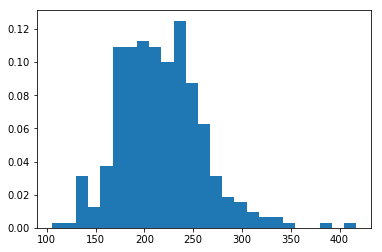

Midpoint of highest cholesterol frequency bin= 223.56


In [46]:
lipids = pd.read_csv("lipids.csv", skiprows=4, index_col=0)
lipidsdis = lipids[lipids.index == 1]

# Creating normalizing variable for frequencies
choletot = lipidsdis['chol'].sum()
weights = (1 / lipidsdis['chol'].shape[0]) * np.ones_like(lipidsdis['chol'])

# Plotting Histogram
n, bin_cuts, patch = plt.hist(lipidsdis['chol'], 25, weights=weights)
plt.show()

# Midpt of bin with highest frequency
midpoint = (bin_cuts[n.argmax()] + bin_cuts[n.argmax()-1])/2
print("Midpoint of highest cholesterol frequency bin= " + str(midpoint))

### (b)

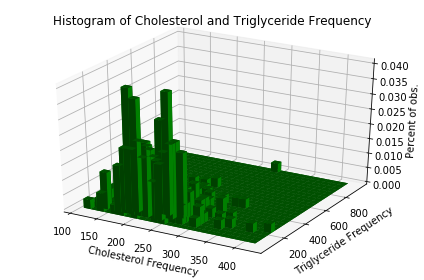

In [53]:
from mpl_toolkits.mplot3d import Axes3D

'''
--------------------------------------------------------------------
bin_num  = integer > 2, number of bins along each axis
hist     = (bin_num, bin_num) matrix, bin percentages
xedges   = (bin_num+1,) vector, bin edge values in x-dimension
yedges   = (bin_num+1,) vector, bin edge values in y-dimension
x_midp   = (bin_num,) vector, midpoints of bins in x-dimension
y_midp   = (bin_num,) vector, midpoints of bins in y-dimension
elements = integer, total number of 3D histogram bins
xpos     = (bin_num * bin_num) vector, x-coordinates of each bin
ypos     = (bin_num * bin_num) vector, y-coordinates of each bin
zpos     = (bin_num * bin_num) vector, zeros or z-coordinates of
            origin of each bin
dx       = (bin_num,) vector, x-width of each bin
dy       = (bin_num,) vector, y-width of each bin
dz       = (bin_num * bin_num) vector, height of each bin
--------------------------------------------------------------------
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = 25
hist, xedges, yedges = np.histogram2d(lipidsdis['chol'], lipidsdis['trig'], bins=bin_num, weights=weights)

x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('Cholesterol Frequency')
ax.set_ylabel('Triglyceride Frequency')
ax.set_zlabel('Percent of obs.')
plt.title('Histogram of Cholesterol and Triglyceride Frequency')

plt.tight_layout()
plt.show()


The key characteristic from this data is the bimodal distribution of cholesterol frequency compared to the single peak of triglyceride frequency. 

### (c)

Just from interpreting this graph, we see that individuals with a cholesterol count of about 150 and a triglyceride count of about 200, and a cholesterol count of about 250 and a triglyceride count of about 200  are most likely to have heart disease. However, this might simply be becuase there is a larger fraction of the population falling into this category. A better gauge would be to look at percentage of population with heart disease and their relative lipid frequencies.

## Problem 8 - Comparing Segments of Time Series

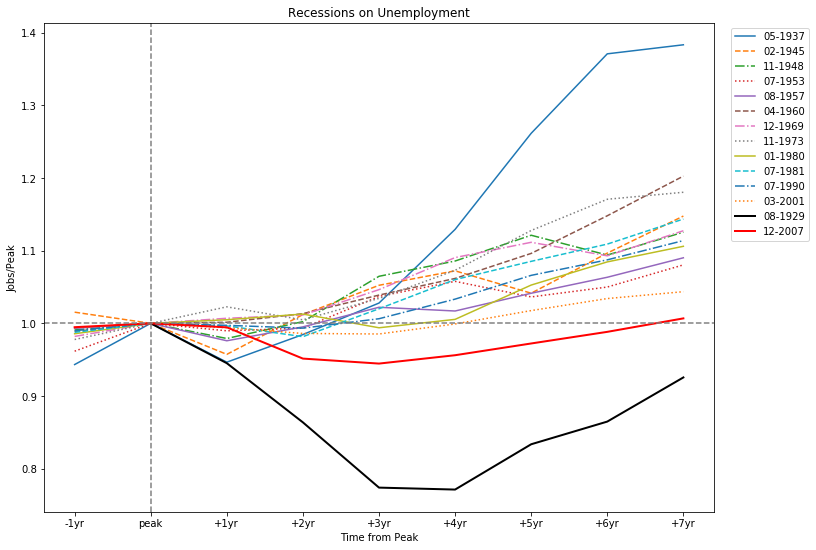

In [169]:
from datetime import datetime

peaks = ["1929-08-01","1937-05-01","1945-02-01","1948-11-01","1953-07-01","1957-08-01","1960-04-01","1969-12-01","1973-11-01","1980-01-01","1981-07-01","1990-07-01","2001-03-01","2007-12-01"]

payems = pd.read_csv('payems.csv', skiprows =[0,1,2,3,4], index_col=0)
payems.index = pd.to_datetime(payems.index)

peaks = pd.Series(peaks)
peaks = pd.to_datetime(peaks)
#Lets generate our first 2 time series with only yearly data

array=[]


#Lets remember to fix the empty values in first list. 

fix = pd.Series([np.nan])
startdate = peaks[0].replace(year=peaks[0].year -1)
enddate = peaks[0].replace(year=peaks[0].year + 7)
payemstemp = payems[(payems.index >= startdate) & (payems.index <= enddate)]
values = payemstemp['payems'].resample('12M').mean()
values = values/values[0]
fixedval = fix.append(values)
fixedval.index = range(1,10)
array.append(fixedval)

for i in range(1,14):
    startdate = peaks[i].replace(year=peaks[i].year -1)
    enddate = peaks[i].replace(year=peaks[i].year + 7)
    payemstemp = payems[(payems.index >= startdate) & (payems.index <= enddate)]
    values = payemstemp['payems'].resample('12M').mean()
    values = values / values[1]
    values.index = range(1,10)
    array.append(values)


#Lets plot graphs. Python automatically varies line color for us, so lets just cycle through line styles.

plt.rcParams["figure.figsize"] = [12,9]

from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
plt.figure()

for i in range(1,13):
    plt.plot(array[i],next(linecycler), label = str(peaks[i].strftime("%m-%Y")))

#Bolding Great Recession and Gret Depression 
plt.plot(array[0],"k", lw=2, label=str(peaks[0].strftime("%m-%Y")))
plt.plot(array[13],"r", lw=2, label=str(peaks[13].strftime("%m-%Y")))

#Horizontal Line at Jobs/Peak =1
plt.axhline(1,linestyle='dashed',color="grey")
#Vertical Line at Peak
plt.axvline(2,linestyle='dashed',color="grey")

#Relabelling X axis tickers
xticklabs = ['-1yr','peak','+1yr','+2yr','+3yr','+4yr','+5yr','+6yr','+7yr']
plt.xticks(range(1,10),xticklabs)

#Labelling Axis
plt.xlabel("Time from Peak")
plt.ylabel("Jobs/Peak")

plt.title("Recessions on Unemployment")
plt.legend(bbox_to_anchor=(1.15,1),loc="upper right", ncol=1)

plt.show()

(j) It seems that the 1937 recession was initially as bad as the great depression in terms of jobs, but made a much quicker recovery.

(k) Comparing the two, there doesn't seem to be any ways in which the great recession in worse than the great depression, apart from a much slower recovery rate (less steep slope from 3years to 7 years after the peak)

## Lab 10 - Introduction to Bokeh

See attached script. Attempted to do as much of the lab as possible, but lacked the boundaries required to do much of the patch glyph portions.